In [5]:
import pandas as pd

deniz = pd.read_csv('eylul2023.csv')
deniz = deniz[deniz['road_type'] == 'DENZ']
deniz

# The dataset seems to contain information about transitions, likely related to some transportation system or network. It includes details such as date, time, line, transfer type, number of passages, and number of passengers.

# Id's are not consistent, because we extracted the data as just one road type (which is sea trasnportation).

,_id,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger
27,28,2023-09-17,17,3,DENZ,EMINONU-KADIKOY,Aktarma,6,6
55,56,2023-09-17,16,3,DENZ,MALTEPE-ADALAR,Aktarma,1,1
68,69,2023-09-14,17,3,DENZ,CUBUKLU-ISTINYE,Aktarma,4,4
89,90,2023-09-22,12,3,DENZ,ANADOLU HISARI-KUCUKSU-ASIYAN,Normal,1,1
91,92,2023-09-19,19,3,DENZ,USKUDAR-EMINONU,Aktarma,25,25
...,...,...,...,...,...,...,...,...,...
4200571,4200572,2023-09-13,10,3,DENZ,KABATAS-Y.KADIKOY,Normal,2,2
4200590,4200591,2023-09-07,20,3,DENZ,ADALAR,Normal,93,93
4200594,4200595,2023-09-12,16,3,DENZ,ANADOLU HISARI-KUCUKSU-ASIYAN,Normal,3,3
4200595,4200596,2023-09-21,15,3,DENZ,ADALAR,Aktarma,9,9


In [3]:
deniz.describe()

,_id,transition_hour,transport_type_id,number_of_passage,number_of_passenger
count,2.337350e+05,233735.000000,233735.0,233735.000000,233735.000000
mean,2.104001e+06,13.931499,3.0,26.554478,23.927863
std,1.212725e+06,4.848267,0.0,68.639642,57.265950
min,2.800000e+01,0.000000,3.0,1.000000,1.000000
25%,1.055124e+06,10.000000,3.0,2.000000,2.000000
50%,2.105514e+06,14.000000,3.0,5.000000,5.000000
75%,3.155919e+06,18.000000,3.0,19.000000,19.000000
max,4.200601e+06,23.000000,3.0,2112.000000,1743.000000


In [6]:
lines = deniz.line.unique()
lines

# There are 48 lines in the dataset. The stop names identifiy the direction of the stops. 
# Such as "KADIKOY-USKUDAR" and "USKUDAR-KADIKOY" are the same line but in different directions.

array(['EMINONU-KADIKOY', 'MALTEPE-ADALAR', 'CUBUKLU-ISTINYE',
       'ANADOLU HISARI-KUCUKSU-ASIYAN', 'USKUDAR-EMINONU',
       'KARAKOY-KADIKOY', 'ESKIHISAR-TOPCULAR', 'ISTINYE-CUBUKLU',
       'BESIKTAS-USKUDAR', 'BOGAZ', 'BOSTANCI-ADALAR',
       'AVCILAR - BOSTANCI', 'USKUDAR-KABATAS', 'KADIKOY-EMINONU',
       'E.KADIKOY-BESIKTAS', 'USKUDAR-BOGAZ', 'KABATAS-ADALAR',
       'KABATAS-USKUDAR', 'ASIYAN-USKUDAR', 'ADALAR-KABATAS', 'ADALAR',
       'BARBAROS-E.KADIKOY', 'KARAKOY-USKUDAR', 'ADALAR-BOSTANCI',
       'KABATAS-Y.KADIKOY', 'Y.KADIKOY-EMINONU', 'KARAKOY-Y.KADIKOY',
       'USKUDAR-BESIKTAS', 'E.KADIKOY-ADALAR', 'Y.KADIKOY-KABATAS',
       'KARAKOY-BOSTANCI', 'CENGELKOY-KABATAS', 'EMINONU-USKUDAR',
       'BESIKTAS-ADALAR', 'USKUDAR-ORTAKOY', 'YENIKOY-BEYKOZ',
       'AVCILAR - BAKIRKOY-KADIKOY', 'Y.KADIKOY-KARAKOY', 'HALIC',
       'SIRKECI-HAREM', 'BOSTANCI-AVCILAR', 'BEYKOZ-YENIKOY',
       'BOSTANCI - MODA - KADIKOY - KABATAS', 'KADIKOY-ORTAKOY',
       'BOSTANCI-KABATAS

In [7]:
# split the line from - , and if there is " " in the line, delete it

stops = []

for line in lines:
    if " " in line:
        line = line.replace(" ", "")
        for x in line.split('-'):
            stops.append(x)
    else:
        for x in line.split('-'):
            stops.append(x)

# select unique stops
stops = set(stops)
stops

{'ADALAR',
 'ANADOLUHISARI',
 'ASIYAN',
 'AVCILAR',
 'BAKIRKOY',
 'BARBAROS',
 'BESIKTAS',
 'BEYKOZ',
 'BOGAZ',
 'BOSTANCI',
 'CENGELKOY',
 'CUBUKLU',
 'E.KADIKOY',
 'EMINONU',
 'ESKIHISAR',
 'HALIC',
 'HAREM',
 'ICHATLAR',
 'ISTINYE',
 'KABATAS',
 'KADIKOY',
 'KARAKOY',
 'KUCUKSU',
 'MALTEPE',
 'MODA',
 'ORTAKOY',
 'SIRKECI',
 'TOPCULAR',
 'USKUDAR',
 'Y.KADIKOY',
 'YENIKAPI',
 'YENIKOY'}

In [7]:
stopsWithLocations = {
    'ADALAR': [40.8737, 29.1278],
    'ANADOLUHISARI': [41.083218, 29.066856],
    'ASIYAN': [41.080949, 29.054243],
    'AVCILAR': [40.971055, 28.718280],
    'BAKIRKOY': [40.972386, 28.877340],
    'BARBAROS': [41.045833, 29.004722],
    'BESIKTAS': [41.042222, 29.007778],
    'BEYKOZ': [41.123611, 29.108333],
    'BOGAZ': [41.106944, 29.038889],
    'BOSTANCI': [40.963889, 29.091667],
    'CENGELKOY': [41.054167, 29.054167],
    'CUBUKLU': [41.079167, 29.054167],
    'E.KADIKOY': [40.981944, 29.027778],
    'EMINONU': [41.016667, 28.966667],
    'ESKIHISAR': [40.776389, 29.436111],
    'HALIC': [41.046111, 28.948889],
    'HAREM': [41.033333, 29.033333],
    'ICHATLAR': [41.033333, 28.933333],
    'ISTINYE': [41.108333, 29.050000],
    'KABATAS': [41.036111, 28.985833],
    'KADIKOY': [40.991667, 29.027778],
    'KARAKOY': [41.026389, 28.973611],
    'KUCUKSU': [41.083333, 29.066667],
    'MALTEPE': [40.933333, 29.133333],
    'MODA': [40.983333, 29.033333],
    'ORTAKOY': [41.050000, 29.033333],
    'SIRKECI': [41.016667, 28.966667],
    'TOPCULAR': [40.983333, 29.033333],
    'USKUDAR': [41.024722, 29.017778],
    'Y.KADIKOY': [40.981944, 29.027778],
    'YENIKAPI': [41.010833, 28.967500],
    'YENIKOY': [41.116667, 29.066667],
}

# geojson format
geojson = {
    "type": "FeatureCollection",
    "features": []
}

# geojson format
for stop in stops:
    geojson['features'].append({
        "type": "Feature",
        "properties": {
            "name": stop
        },
        "geometry": {
            "type": "Point",
            "coordinates": stopsWithLocations[stop]
        }
    })

geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'name': 'MALTEPE'},
   'geometry': {'type': 'Point', 'coordinates': [40.933333, 29.133333]}},
  {'type': 'Feature',
   'properties': {'name': 'Y.KADIKOY'},
   'geometry': {'type': 'Point', 'coordinates': [40.981944, 29.027778]}},
  {'type': 'Feature',
   'properties': {'name': 'YENIKAPI'},
   'geometry': {'type': 'Point', 'coordinates': [41.010833, 28.9675]}},
  {'type': 'Feature',
   'properties': {'name': 'USKUDAR'},
   'geometry': {'type': 'Point', 'coordinates': [41.024722, 29.017778]}},
  {'type': 'Feature',
   'properties': {'name': 'ISTINYE'},
   'geometry': {'type': 'Point', 'coordinates': [41.108333, 29.05]}},
  {'type': 'Feature',
   'properties': {'name': 'HAREM'},
   'geometry': {'type': 'Point', 'coordinates': [41.033333, 29.033333]}},
  {'type': 'Feature',
   'properties': {'name': 'KADIKOY'},
   'geometry': {'type': 'Point', 'coordinates': [40.991667, 29.027778]}},
  {'type': 'Feature',
   

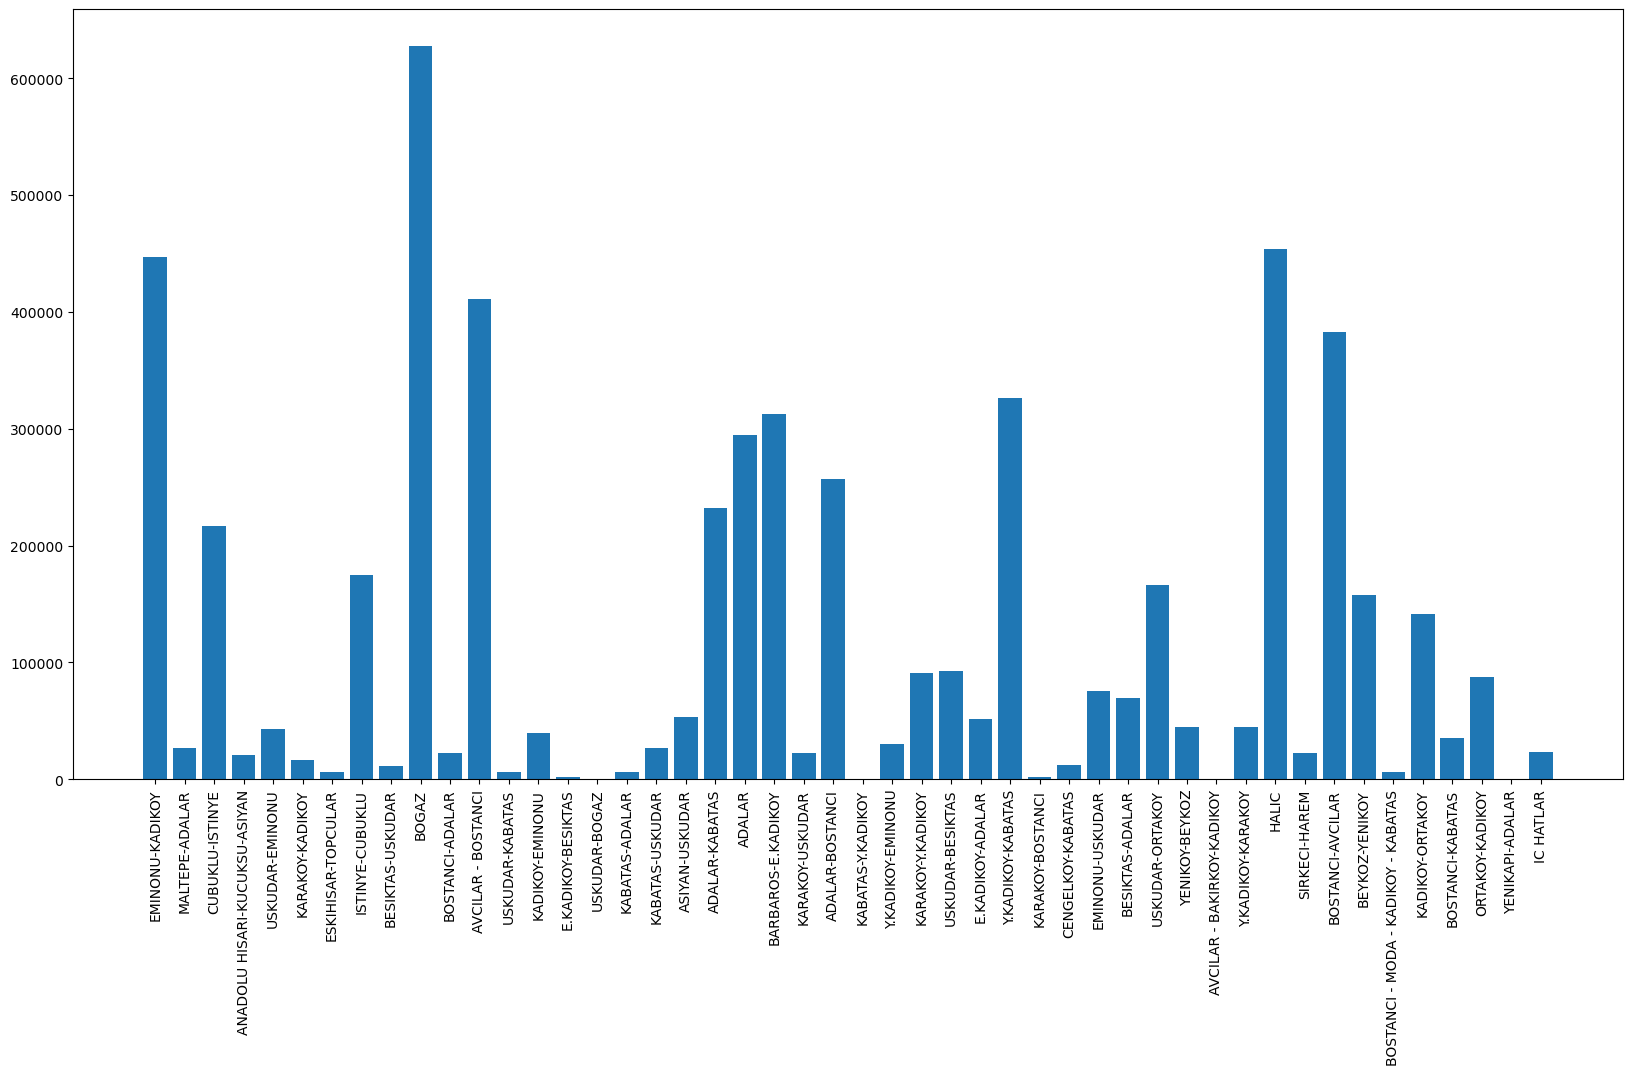

In [9]:
# The bar graph for lines with the number of passengers
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(lines, deniz.groupby('line')['number_of_passenger'].sum())
plt.xticks(rotation=90)
plt.show()


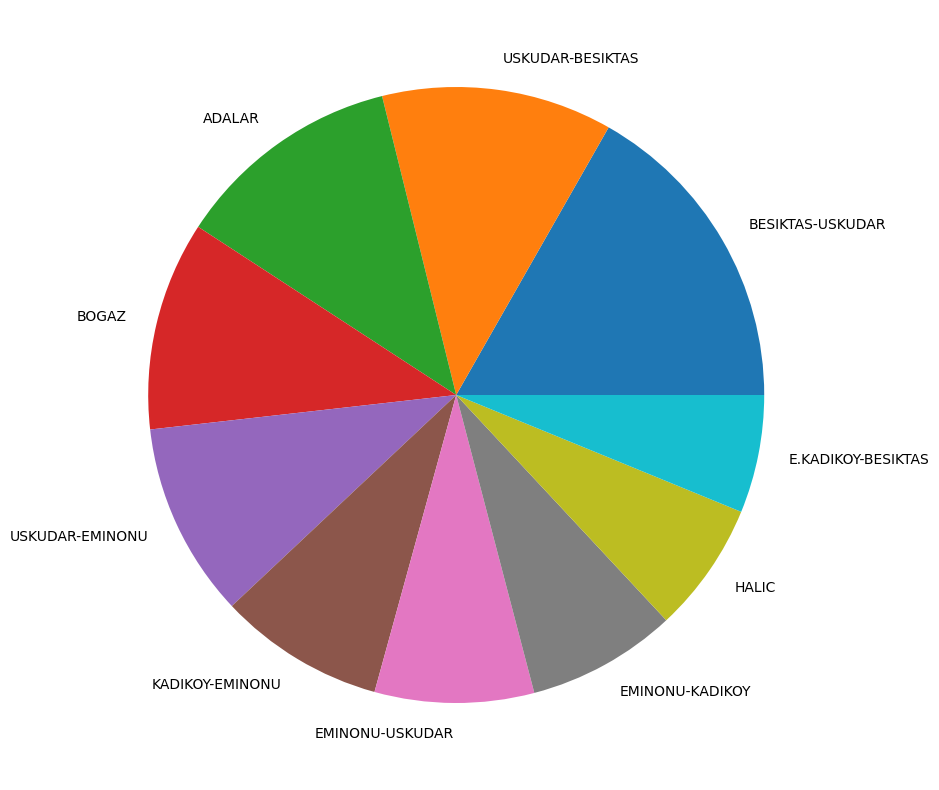

In [12]:
# create pie chart for the lines which are top 10, with the number of passengers

plt.figure(figsize=(20, 10))
plt.pie(deniz.groupby('line')['number_of_passenger'].sum().nlargest(10),
        labels=deniz.groupby('line')['number_of_passenger'].sum().nlargest(10).index)
plt.show()


In [9]:
# Earliest and latest transition date
print("Earliest transition date: ", deniz['transition_date'].min())
print("Latest transition date: ", deniz['transition_date'].max())

Earliest transition date:  2023-09-01
Latest transition date:  2023-09-30


In [14]:
# Calculate density ( current number_of_passenger / maximum of number_of_passenger of line in all times ) for each line for each transition_hour, and find day of week and add it to the dataframe

df = deniz.copy()
df['density'] = df['number_of_passenger'] / df.groupby('line')['number_of_passenger'].transform('max')
df['day_of_week'] = pd.to_datetime(df['transition_date']).dt.day_name()
df

,_id,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger,density,day_of_week
27,28,2023-09-17,17,3,DENZ,EMINONU-KADIKOY,Aktarma,6,6,0.008955,Sunday
55,56,2023-09-17,16,3,DENZ,MALTEPE-ADALAR,Aktarma,1,1,0.007519,Sunday
68,69,2023-09-14,17,3,DENZ,CUBUKLU-ISTINYE,Aktarma,4,4,0.052632,Thursday
89,90,2023-09-22,12,3,DENZ,ANADOLU HISARI-KUCUKSU-ASIYAN,Normal,1,1,0.010526,Friday
91,92,2023-09-19,19,3,DENZ,USKUDAR-EMINONU,Aktarma,25,25,0.042955,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
4200571,4200572,2023-09-13,10,3,DENZ,KABATAS-Y.KADIKOY,Normal,2,2,0.009009,Wednesday
4200590,4200591,2023-09-07,20,3,DENZ,ADALAR,Normal,93,93,0.113831,Thursday
4200594,4200595,2023-09-12,16,3,DENZ,ANADOLU HISARI-KUCUKSU-ASIYAN,Normal,3,3,0.031579,Tuesday
4200595,4200596,2023-09-21,15,3,DENZ,ADALAR,Aktarma,9,9,0.011016,Thursday


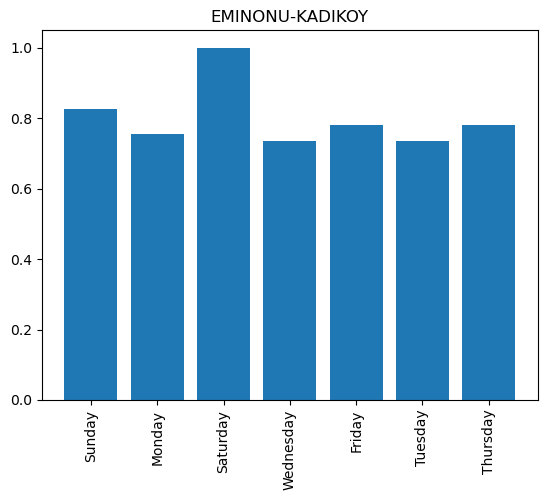

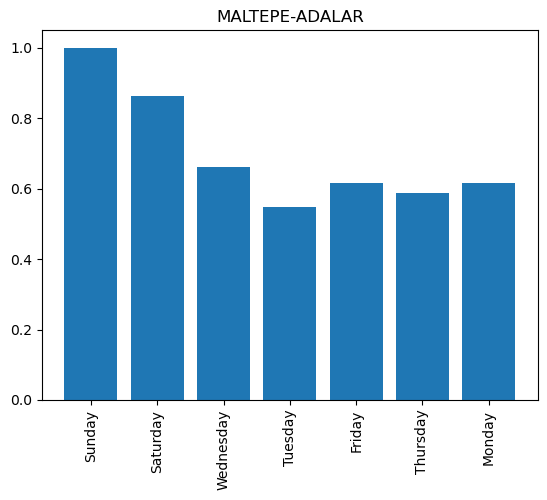

In [28]:
#  The bar graph for each line in lines for the density and group by day_of_week and add title to each graph 

for line in lines[:2]:
    plt.bar(df[df['line'] == line].day_of_week, df[df['line'] == line].density)
    plt.xticks(rotation=90)
    plt.title(line)
    plt.show()


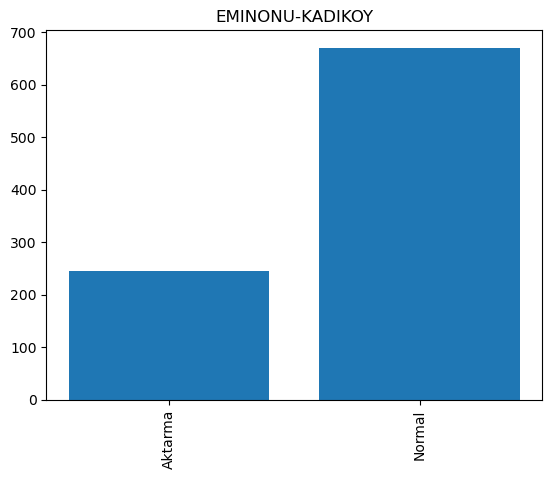

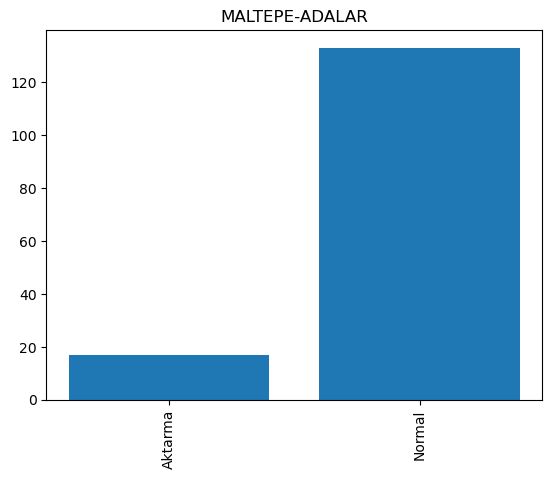

In [14]:
# The bar graphs  for each line in lines for the transfer_type is "Normal" or "Aktarma" and add title to each graph

for line in lines[:2]:
    plt.bar(deniz[deniz['line'] == line].transfer_type, deniz[deniz['line'] == line].number_of_passenger)
    plt.xticks(rotation=90)
    plt.title(line)
    plt.show()


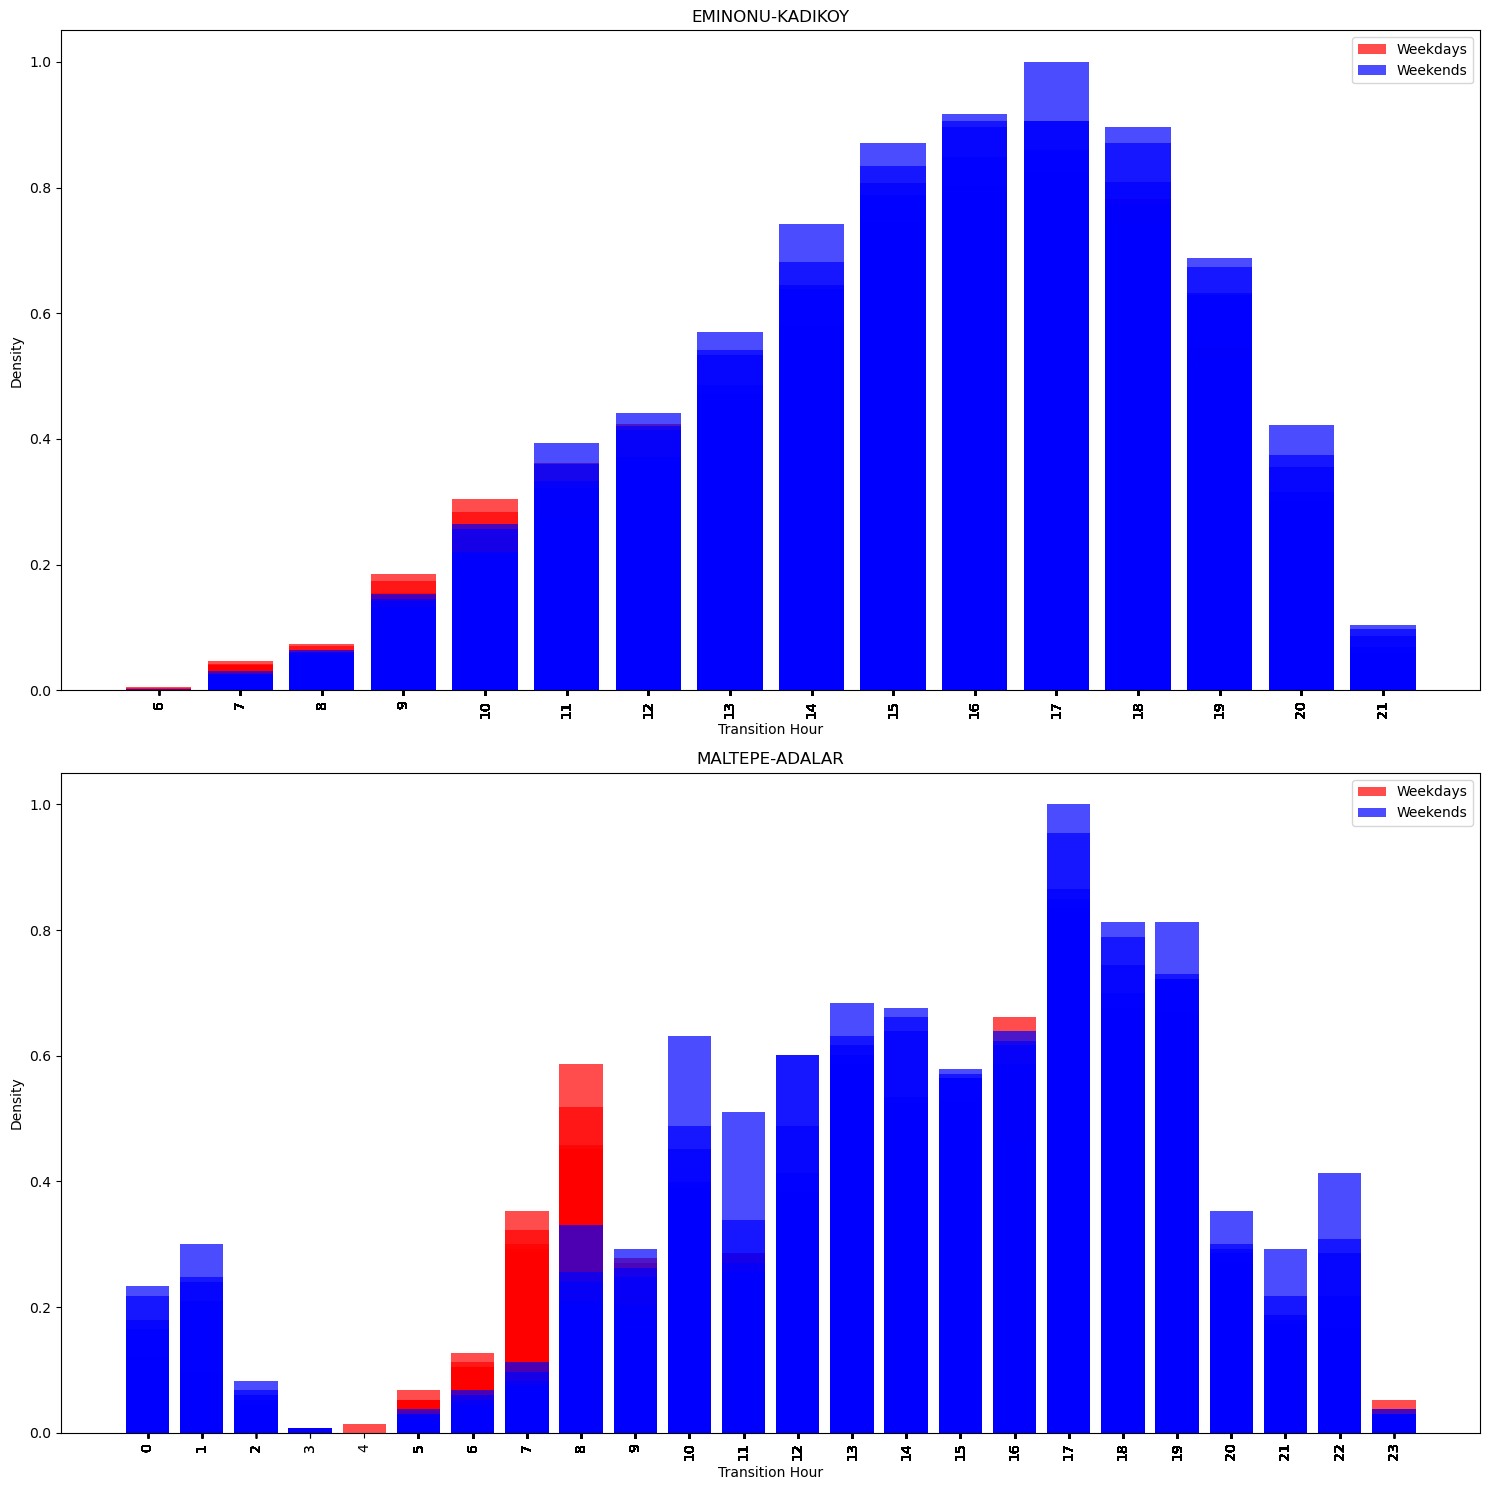

In [67]:
# Create graphs comparing hourly density of weekdays and weekends avarage densities for each line in separate graphs and add title to each graph
# Assuming df is your DataFrame and lines is a list of the lines you want to iterate through

fig, axs = plt.subplots(2, 1, figsize=(15, 15))

for i, line in enumerate(lines[:2]):
    ax = axs[i]
    weekdays_data = df[(df['line'] == line) & (df['day_of_week'] != 'Saturday') & (df['day_of_week'] != 'Sunday')]
    weekends_data = df[(df['line'] == line) & ((df['day_of_week'] == 'Saturday') | (df['day_of_week'] == 'Sunday'))]

    ax.bar(weekdays_data.transition_hour, weekdays_data.density, color='r', label='Weekdays', alpha=0.7)
    ax.bar(weekends_data.transition_hour, weekends_data.density, color='b', label='Weekends', alpha=0.7)
    ax.set_title(line)
    ax.legend()

    ax.set_xticks(weekdays_data.transition_hour)
    ax.set_xticklabels(weekdays_data.transition_hour, rotation=90)
    ax.set_xlabel('Transition Hour')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

In [15]:
# find the line of most "Aktarma" transfer_type 
deniz[deniz['transfer_type'] == 'Aktarma'].groupby('line')['number_of_passenger'].sum().idxmax()

'USKUDAR-BESIKTAS'

In [71]:
# find the line of most "Normal" transfer_type
deniz[deniz['transfer_type'] == 'Normal'].groupby('line')['number_of_passenger'].sum().idxmax()

'BESIKTAS-USKUDAR'

In [17]:
# find the top 3 lines of most crowded in the between 6 and 10
deniz[(deniz['transition_hour'] >= 6) & (deniz['transition_hour'] <= 10)].groupby('line')[
    'number_of_passenger'].sum().nlargest(3)

line
USKUDAR-BESIKTAS    133153
ADALAR              102319
USKUDAR-EMINONU     101181
Name: number_of_passenger, dtype: int64

In [18]:
# find the top 3 lines of most crowded in the between 16 and 18
deniz[(deniz['transition_hour'] >= 16) & (deniz['transition_hour'] <= 18)].groupby('line')[
    'number_of_passenger'].sum().nlargest(3)

line
BESIKTAS-USKUDAR    209477
BOGAZ               162636
EMINONU-USKUDAR     119295
Name: number_of_passenger, dtype: int64